# **Exploring Stress-Related Brain Activity: A Neuroimaging Analysis**

**Author**: Sofie Veld  
**Date**: 15 december 2024  

This project investigates brain regions associated with stress using neuroimaging data. The analysis visualizes functional and anatomical MRI data, highlights voxel intensity distributions, and provides insights into stress-related neural activity.

**Relevant Neurosynth Page**: [Stress - Neurosynth Concept Page](https://neurosynth.org/analyses/stress)  

This script uses the **nilearn**, **nibabel**, and **matplotlib** libraries to visualize neuroimaging data. 
Specifically:
1. **`os` module**: Handles file and directory operations.
2. **`nilearn.plotting.plot_stat_map`**: Provides functionality to visualize statistical maps (e.g., fMRI results) overlaid on a brain anatomical image.
3. **`nibabel`**: Handles loading and manipulation of neuroimaging file formats (e.g., NIfTI).
4. **`matplotlib.pyplot`**: Generates plots and visualizations.

The code is designed to load neuroimaging data, process it, and produce visual representations of the results.

In [1]:
import os  # Used for interacting with the file system
from nilearn.plotting import plot_stat_map  # For plotting neuroimaging data
import nibabel as nib  # Used for loading and processing NIFTI files
from matplotlib import pyplot as plt  # For creating plots and visualizations

This function, **`find_mri_files`**, is designed to locate and categorize MRI files within a specified folder and its subdirectories.

1. **Input Arguments**:
    - `folder_path`: The directory path where the function searches for files.
    - `extension`: The type of files to look for (default is `.nii.gz`, a common neuroimaging file format).
2. **Process**:
    - Uses the **`os.walk`** method to recursively search for files in the folder and subfolders.
    - Collects files that match the specified extension into a list.
3. **Categorization**:
    - Files are categorized into **'functional'** and **'anatomical'** based on keywords in their filenames:
        - Filenames containing "uniformity" are identified as *functional*.
        - Filenames containing "anatomical" are identified as *anatomical*.
4. **Output**:
    - Returns a dictionary with keys `'functional'` and `'anatomical'`, mapping to the corresponding file paths.

Finally, the function is applied to the current working directory using **`os.getcwd`**, and the results are stored in the `mri` variable.

In [2]:
def find_mri_files(folder_path, extension=".nii.gz"):
    """
    Locate MRI files in the specified folder and subdirectories.

    Args:
        folder_path (str): The directory to search in.
        extension (str): File extension to search for (default is '.nii.gz').

    Returns:
        dict: A dictionary categorizing files as 'functional' or 'anatomical', if possible.
    """
    mri_files = []

    # Walk through the directory to find files with the specified extension
    for root, _, files in os.walk(folder_path):
        for file in files:
            if file.endswith(extension): # Only searching through the NIFTI files
                mri_files.append(os.path.join(root, file)) # Add the file path to the list

    # Categorize files as functional or anatomical based on their name
    categorized_files = {"functional": None, "anatomical": None}
    for file in mri_files:
        if "uniformity" in file.lower(): # Heuristic for functional data (e.g., stress-related)
            categorized_files["functional"] = file
        elif "anatomical" in file.lower(): # Heuristic for anatomical data
            categorized_files["anatomical"] = file

    return categorized_files # Return the categorized files

# Use the current working directory to search
current_folder = os.getcwd() # Get the current working directory
mri = find_mri_files(current_folder) # Find the MRI files in that directory

This code snippet uses **`plot_stat_map`** from the **nilearn.plotting** module to visualize the functional MRI statistical map overlaid on an anatomical brain image.
1. **Inputs**:
    - **`mri["functional"]`**: Path to the functional MRI statistical map.
    - **`bg_img=mri["anatomical"]`**: Path to the anatomical brain image to use as the background.
2. **Visualization Settings**:
    - **`cut_coords=(-22, -4, -15)`**: Specifies the coordinates for slicing the brain in 3D space. These values were determined empirically.
    - **`title="Brain Regions associated with Stress"`**: Adds a title to the plot.
    - **`threshold=0.1`**: Sets a threshold for statistical values to display, hiding regions below this value.
    - **`cmap="spring"`**: Specifies the color map to visualize the statistical values.

The result is a visual representation highlighting brain regions associated with stress, based on the functional and anatomical data gathered with `find_mri_files()`.

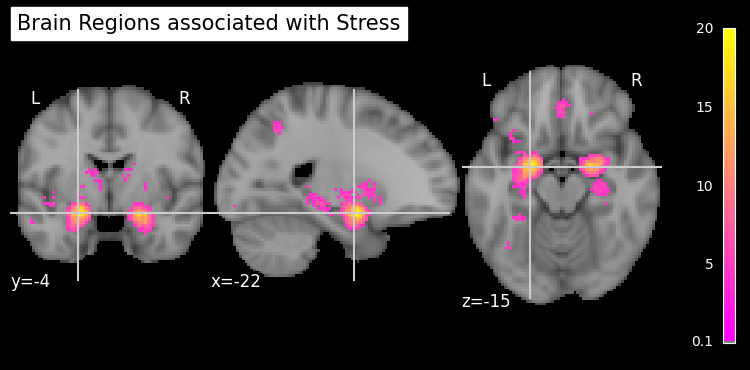

In [3]:
plot_stat_map(mri["functional"], # The functional MRI data to display
              bg_img=mri["anatomical"], # The anatomical image to use as the background
              cut_coords=(-22, -4, -15), # Slice coordinates for displaying the brain (empirically determined)
              title="Brain Regions associated with Stress", # Title for the plot
              threshold=0.1, # Statistical threshold for which values to display (voxels with a value above 0.1)
              cmap="spring") # Colormap to use for visualizing the map (spring color map)

This code snippet processes the functional MRI dataset to analyze and visualize the voxel intensity distribution.
1. **Load MRI Data**:
    - **`nib.load(mri["functional"])`**: Loads the functional MRI data (a NIFTI file) using **nibabel**.
    - **`img.get_fdata()`**: Extracts the numerical data array from the loaded image.
2. **Filter Data**:
    - Selects only positive intensity values (**`data[data > 0]`**) from the dataset, as these typically represent meaningful activity.
3. **Histogram Plotting**:
    - **`plt.hist`**: Creates a histogram to visualize the distribution of positive voxel intensity values.
    - **Figure Settings**:
        - **`figsize=(10, 6)`**: Adjusts the figure size for better clarity.
        - **`color='hotpink'`**: Sets the color of the histogram bars.
    - **Labels and Title**:
        - **`title`**: Describes the plot as "Voxel Intensity Distribution for fMRI Data of Stress-Related Brain Regions".
        - **`xlabel` and `ylabel`**: Provide axis labels for intensity values and their frequencies.
    - **`grid=True`**: Adds a grid to enhance visual comparison of frequencies.
4. **Display**:
    - **`plt.show()`**: Renders the histogram, revealing the intensity value distribution of voxels related to stress-activated brain regions.

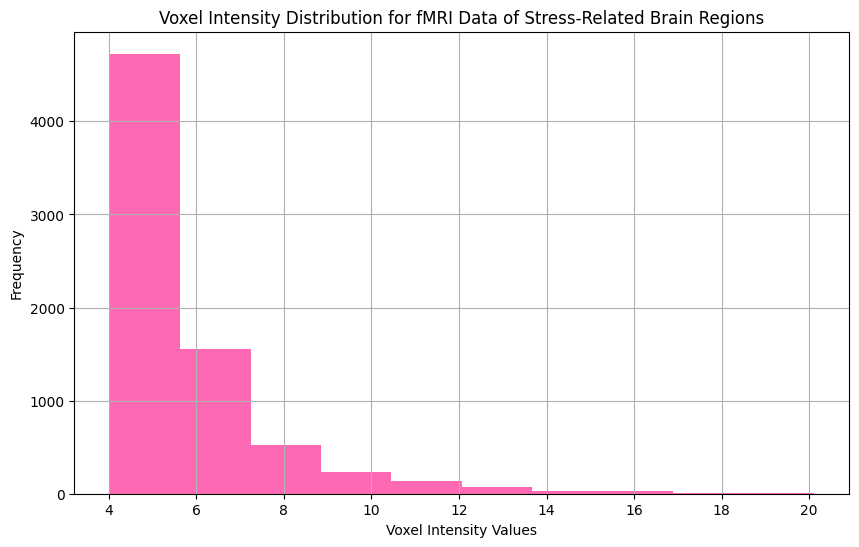

In [4]:
# Load the NIFTI file for functional MRI data
img = nib.load(mri["functional"]) # Load the MRI file using nibabel
data = img.get_fdata() # Extract the numerical data from the NIFTI file

# Select all positive values from the data (only consider meaningful brain activity)
positive_values = data[data > 0] # Filter out zero and negative intensity values (background noise)

# Plot the histogram of positive voxel intensities
plt.figure(figsize=(10, 6)) # Set the size of the plot (empirically determined for good visibility)
plt.hist(positive_values, color='hotpink') # Create a histogram with 'hotpink' color for the bars
plt.title("Voxel Intensity Distribution for fMRI Data of Stress-Related Brain Regions") # Title of the plot
plt.xlabel("Voxel Intensity Values") # X-axis label: represents the intensity of brain activity in each voxel
plt.ylabel("Frequency") # Y-axis label: represents the number of voxels at each intensity value
plt.grid(True) # Enable grid for easier comparison of frequencies
plt.show() # Display the plot